In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)



*   Sex - пол [мужчина/женщина]
*   Age - возраст, округленный до 5 лет
*   Height - рост, округленный до 5 см [см]
*   Weight - вес [кг]
*   Waistline - обхват талии
*   Sight_left - качество зрения левого глаза (идеальное зрение = 1.0)
*   Sight_right - качество зрения правого глаза
*   Hear_left - качество слуха левого уха (1 нормальный слух, 2 ненормальный)
*   Hear_right - качество слуха левого уха
*   SBP - систолическое артериальное давление [мм рт.ст.]
*   DBP - диастолическое артериальное давление [мм рт.ст.]
*   BLDS - БПК или ФСГ (уровень глюкозы в крови натощак) [мг/дл]
*   Tot_chole - общий холестерин [мг/дл]
*   HDL_chole - уровень холестерина ЛПВП (липопротеины высокой плотности) [мг/дл]
*   LDL_chole - холестерин ЛПНП (холестерин низкой плотности) [мг/дл]
*   Триглицерид - триглицерид [мг/дл]
*   Гемоглобин - гемоглобин [г/дл]
*   Urine_protein - белок в моче
*   Serum_creatinine - креатинин сыворотки (крови) [мг/дл] 혈청 크레아티닌
*   SGOT_AST - SGOT (глутамат-оксалоацетаттрансаминаза) AST (аспартаттрансаминаза)[МЕ/л]
*   SGOT_ALT - АЛТ (аланиновая трансаминаза)[МЕ/л]
*   Gamma_GTP - y-глутамилтранспептидаза[МЕ/л]
*   SMK_stat_type_cd - состояние курения, 1 (никогда), 2 (раньше курил, но бросил), 3 (все еще курю)
*   DRK_YN - Пьющий или нет



# 1 Изучение общей информации

In [2]:
data = pd.read_csv("drive/MyDrive/smoking_driking_dataset_Ver01.csv")

In [3]:
# размер таблицы
data.shape

(991346, 24)

In [4]:
# первые пять строк таблицы
print(data.head())

    sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0        1.0   
1  Male   30     180      80       89.0         0.9          1.2        1.0   
2  Male   40     165      75       91.0         1.2          1.5        1.0   
3  Male   50     175      80       91.0         1.5          1.2        1.0   
4  Male   50     165      60       80.0         1.0          1.2        1.0   

   hear_right    SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0         1.0  120.0  ...      126.0          92.0        17.1            1.0   
1         1.0  130.0  ...      148.0         121.0        15.8            1.0   
2         1.0  120.0  ...       74.0         104.0        15.8            1.0   
3         1.0  145.0  ...      104.0         106.0        17.6            1.0   
4         1.0  138.0  ...      117.0         104.0        13.8            1.0   

   serum_creatinine  SGOT_AST  SGOT_AL

In [5]:
# типы столбцов
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

# 2 Предобработка данных



In [6]:
# описательные статистики
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,991346.0,47.614491,14.181339,20.0,35.0,45.0,60.0,85.0
height,991346.0,162.240625,9.282957,130.0,155.0,160.0,170.0,190.0
weight,991346.0,63.284050,12.514241,25.0,55.0,60.0,70.0,140.0
waistline,991346.0,81.233358,11.850323,8.0,74.1,81.0,87.8,999.0
sight_left,991346.0,0.980834,0.605949,0.1,0.7,1.0,1.2,9.9
sight_right,991346.0,0.978429,0.604774,0.1,0.7,1.0,1.2,9.9
hear_left,991346.0,1.031495,0.174650,1.0,1.0,1.0,1.0,2.0
hear_right,991346.0,1.030476,0.171892,1.0,1.0,1.0,1.0,2.0
SBP,991346.0,122.432498,14.543148,67.0,112.0,120.0,131.0,273.0
DBP,991346.0,76.052627,9.889365,32.0,70.0,76.0,82.0,185.0


In [7]:
# количество пропусков
data.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [8]:
data.duplicated().sum()

26

In [9]:
# удалить дубликаты
data = data.drop_duplicates()

In [10]:
data.duplicated().sum()

0

# 3 Исследовательский анализ данных



## Одномерный анализ

In [11]:
data['sex'].value_counts()

Male      526399
Female    464921
Name: sex, dtype: int64

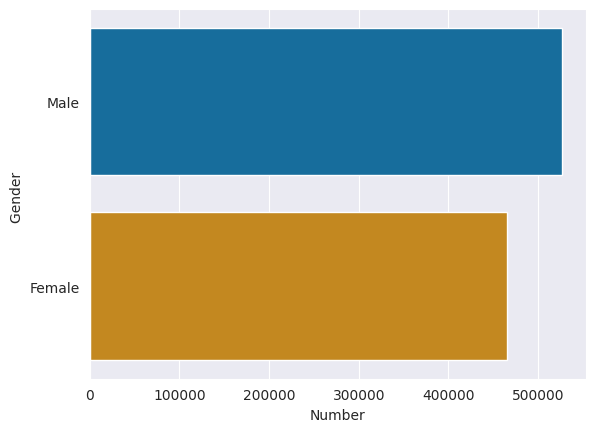

In [12]:
sns.set_style('darkgrid')
sns.countplot(y='sex',data=data,palette='colorblind')
plt.xlabel('Number')
plt.ylabel('Gender ')
plt.show()

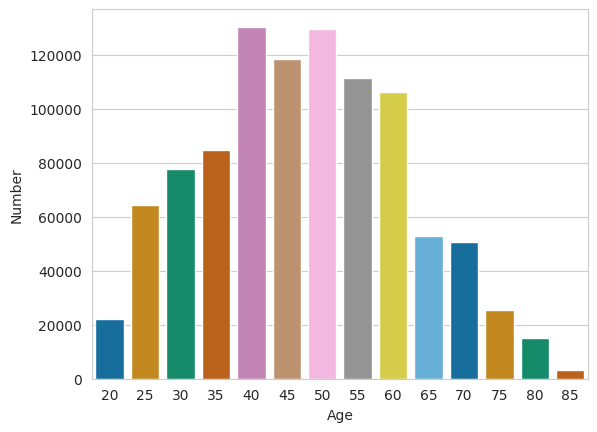

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='age',data=data,palette='colorblind')
plt.xlabel("Age")
plt.ylabel("Number")
plt.show()

In [14]:
data['DRK_YN'].value_counts()

N    495844
Y    495476
Name: DRK_YN, dtype: int64

In [15]:
data['SMK_stat_type_cd'].value_counts()

1.0    602431
3.0    213945
2.0    174944
Name: SMK_stat_type_cd, dtype: int64

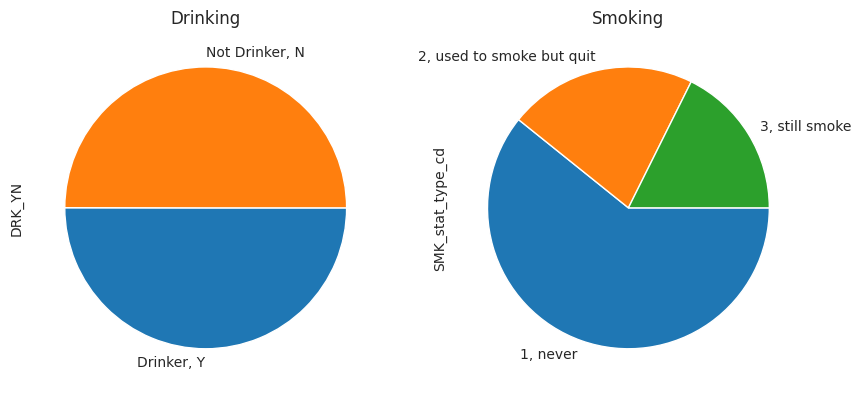

In [16]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
labels = ['Drinker, Y', 'Not Drinker, N']
data['DRK_YN'].value_counts().plot.pie(labels=labels, counterclock=False)
plt.title('Drinking')

plt.subplot(1, 2, 2)
labels = ['1, never', '2, used to smoke but quit', '3, still smoke']
data['SMK_stat_type_cd'].value_counts().plot.pie(labels=labels, counterclock=False)
plt.title('Smoking')
plt.show()

# Многомерный анализ

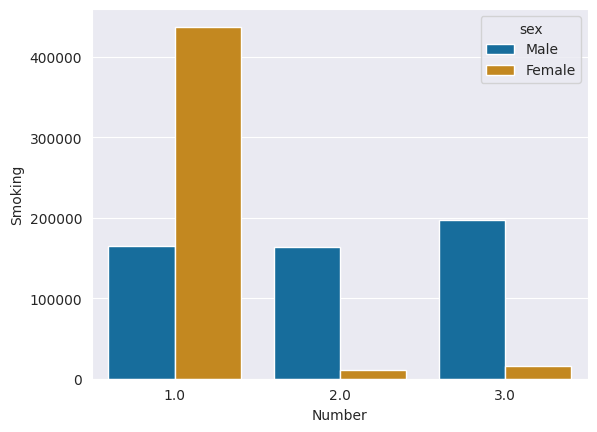

In [17]:
sns.set_style('darkgrid')
sns.countplot(data=data,x='SMK_stat_type_cd',hue='sex',palette='colorblind')
plt.xlabel("Number")
plt.ylabel("Smoking")
plt.show()

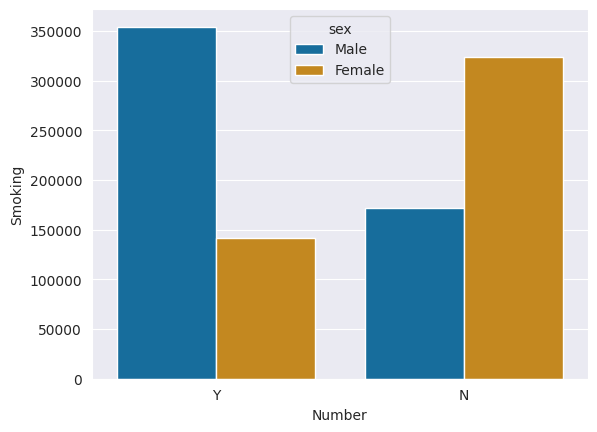

In [18]:
sns.set_style('darkgrid')
sns.countplot(data=data,x='DRK_YN',hue='sex',palette='colorblind')
plt.xlabel("Number")
plt.ylabel("Smoking")
plt.show()

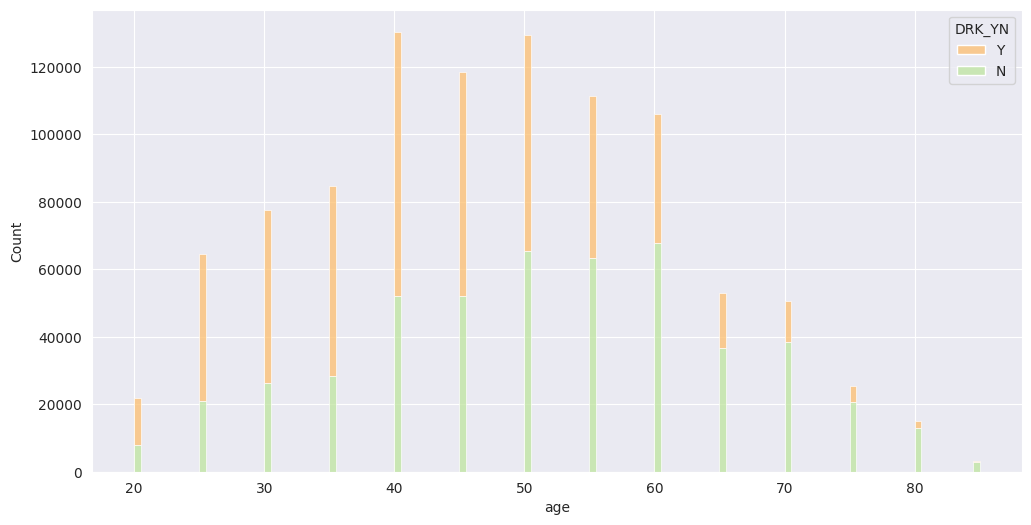

In [19]:
plt.figure(figsize=(12,6))
sns.histplot(data=data,x='age',palette='Spectral',hue='DRK_YN',multiple='stack')
plt.show()

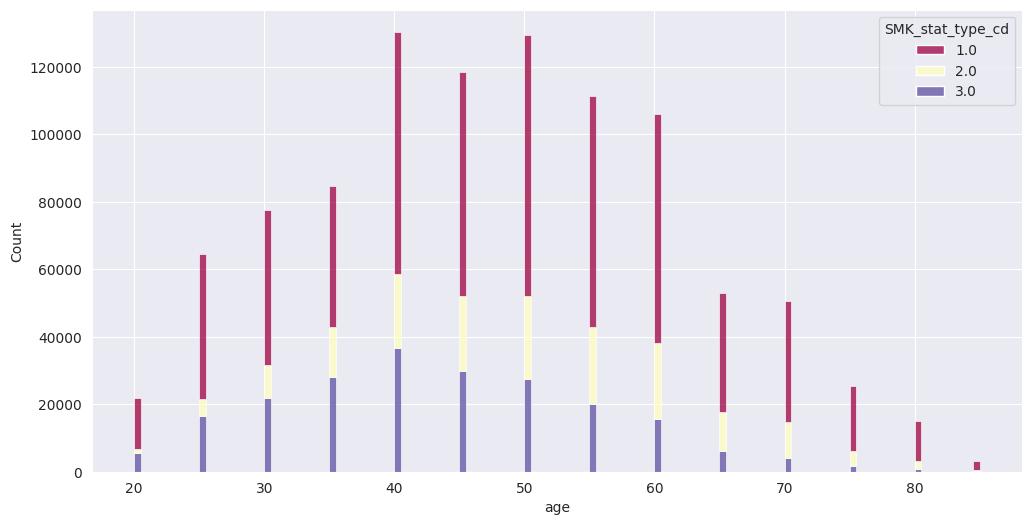

In [20]:
plt.figure(figsize=(12,6))
labels = ['1, never', '2, used to smoke but quit', '3, still smoke']
sns.histplot(data=data,x='age',palette='Spectral',hue='SMK_stat_type_cd',multiple='stack')
plt.show()

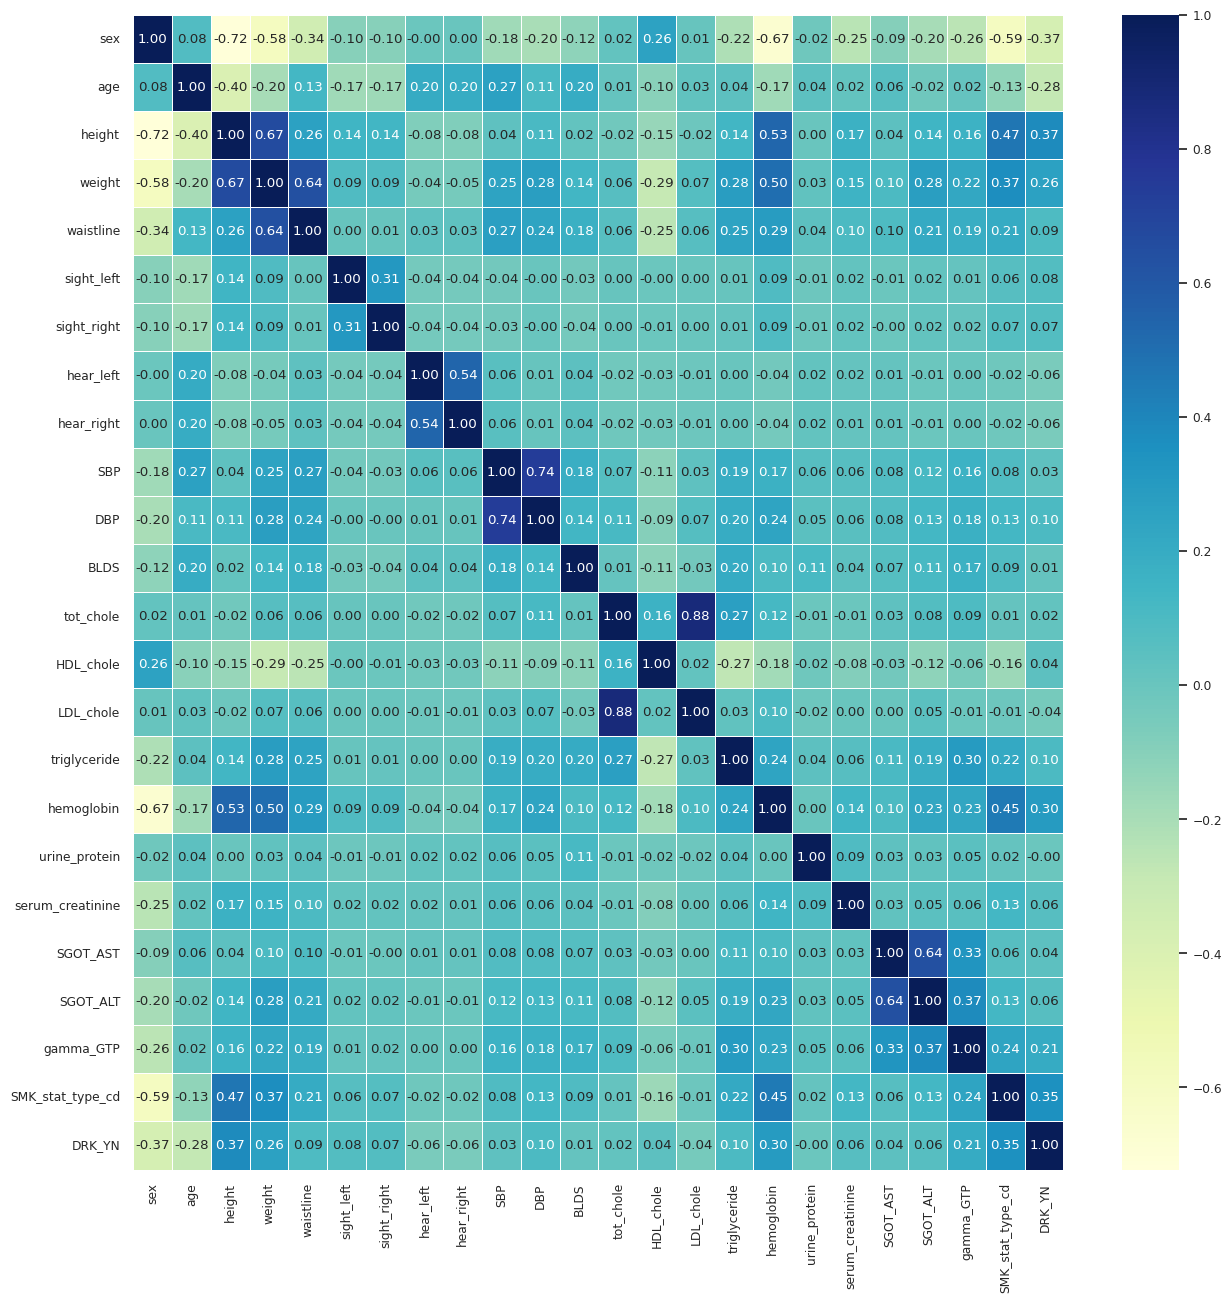

In [21]:
data_copy = data.copy()

data_copy['sex'] = data_copy['sex'].map({'Male':1,'Female':2})
data_copy['DRK_YN'] = data_copy['DRK_YN'].map({'Y':1,'N':0})

corr_matrix=data_copy.corr()
plt.figure(figsize = (15,15))
sns.set(font_scale=0.8)
sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="YlGnBu")
plt.show()